# Grafiksel Nedensel Modellerin (GCMs) Modellenmesi

Kök neden analizi (root cause analysis) veya kenarların nedensel gücünü ölçmek gibi grafiksel nedensel modellere dayalı nedensel görevleri gerçekleştirmek için, değişkenlerin altında yatan veri oluşturma sürecinin doğasını da bilmemiz gerekir. Nedensel bir grafik, kendi başına bir diyagram olduğundan, veri üretme süreci hakkında herhangi bir bilgiye sahip değildir.

DoWhy'daki GCM tabanlı çıkarımın tüm ana özellikleri, **grafiksel nedensel modeller** kavramı etrafında inşa edilmiştir. Grafiksel bir nedensel model, değişkenlerin nedensel yönlendirilmiş döngüsel olmayan(acyclic) grafiğinden (DAG) ve değişkenlerin her biri için bir **nedensel mekanizmadan** oluşur. Nedensel bir mekanizma, grafikte ebeveynleri verilen bir değişkenin koşullu dağılımını veya kök düğüm değişkenleri durumunda basitçe dağılımını tanımlar. Kök olmayan düğümler için, $X_i$ düğümünü $X_i=f\left(P A_{X_i}, N_i\right)$ olarak tanımlayabiliriz. Burada $P A_{X_i}$, $X_i$'nin ebeveynlerini ve $N_i$ ise gürültüyü temsil eder.

GCM'nin en genel durumu, nedensel mekanizmaların koşullu stokastik modeller ve stokastik modeller tarafından tanımlandığı **olasılıksal bir nedensel modeldir (probabilistic causal model-PCM)**. dowhy.gcm paketinde bunlar ProbabilisticCausalModel, ConditionalStochasticModel ve StochasticModel ile temsil edilir.

![PCM](../img/pcm.png)

Ancak pratik anlamda, GCM'lerimizi temsil etmek için sıklıkla tersine çevrilebilir **yapısal nedensel modeller (structural causal model-SCM'ler)** kullanırız ve nedensel mekanizmalar, kök olmayan düğümler için **fonksiyonel nedensel modeller (functional causal model-FCM'ler)** ve kök düğümler için stokastik modeller tarafından tanımlanır. Tersine çevrilebilir bir SCM, bir PCM ile aynı özellikleri uygular, ancak bunun da ötesinde, FCM'leri, ebeveynlere ve gürültüye dayalı olarak veri oluşturma süreci hakkında daha fazla mantık yürütmemize olanak tanır ve dolayısıyla, örn. karşı-olgusalları hesaplamak için. Grafik türleri ve bunların etkileri hakkında daha fazla ayrıntı için Grafiksel nedensel model türleri bölümüne bakın.

![SCM](../img/scm.png)

Bu girişi basit tutmak için şimdilik SCM'leri kullanmaya devam edeceğiz.

Yukarıda belirtildiği gibi nedensel bir mekanizma, bir düğümün değerlerinin, ana düğümlerinin değerlerinden nasıl etkilendiğini açıklar. Nedensel Mekanizma Atamasını Özelleştirme bölümünde nedensel mekanizmaların ayrıntılarına ve anlamlarına çok daha derinlemesine bakacağız. Ancak bu girişte, bunları nedensel soruları yanıtlamak için gerekli olan, anlaşılmaz bir şey olarak ele alacağız.

Bu veri oluşturma sürecini tanıtmak için nedensel grafiğimizin üzerine inşa edilmiş bir SCM kullanıyoruz:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from dowhy import gcm
import networkx as nx

In [2]:
causal_model = gcm.StructuralCausalModel(nx.DiGraph([("X", "Y"), ("Y", "Z")]))

In [3]:
X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))
data.head()

,X,Y,Z
0,-1.468369,-2.668025,-8.595260
1,-0.730116,-2.725460,-9.089786
2,-0.492433,-0.914354,-2.888134
3,-1.604451,-3.413145,-9.215725
4,-0.885224,-1.244847,-2.415860


Yukarıda oluşturulan grafikte X, Y, Z sütunlarının X, Y, Z düğümlerimize nasıl karşılık geldiğine dikkat edin. Ayrıca bu veri setinde X değerlerinin Y değerlerini nasıl etkilediğini ve Y değerlerinin Z değerlerini nasıl etkilediğini de görebiliriz.

Yukarıda oluşturulan nedensel model, artık her düğüme nedensel mekanizmaları işlevsel nedensel modeller biçiminde atamamıza olanak tanır. Burada bu mekanizmalar, örneğin belirli nedensel ilişkiler hakkında önceden bilgi biliniyorsa manuel olarak atanabilir veya otomatik modül kullanılarak otomatik olarak atanabilir. İkincisi için basitçe şunu çağırırız:

In [4]:
gcm.auto.assign_causal_mechanisms(causal_model, data)

Atanan mekanizmalar üzerinde daha fazla kontrol sahibi olmak istersek bunu manuel olarak da yapabiliriz. Örneğin, X kök düğümüne ampirik bir dağılım ve Y ve Z düğümlerine doğrusal toplamsal gürültü modelleri atayabiliriz:

In [5]:
causal_model.set_causal_mechanism('X', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('Y', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('Z', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))

Nedensel Mekanizma Atamasını Özelleştirme Bölümü, kişinin tamamen özelleştirilmiş bir modeli nasıl tanımlayabileceği veya kendi uygulamasını nasıl ekleyebileceği konusunda daha ayrıntılı bilgi verecektir.

Gerçek dünyada veriler, bir değişkenin diğerini nasıl etkilediğini genellikle bilmediğimiz, opak bir değerler akışı olarak gelir. Grafiksel nedensel modeller, daha önce bilmiyor olsak bile, bu nedensel ilişkileri yeniden yapılandırmamıza yardımcı olabilir.

### SCM'in Veriye Uydurulması

Eldeki veriler ve daha önce oluşturulan grafikle artık SCM'yi uydurab
liriz:

In [6]:
gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 214.29it/s]


Uydurma, SCM'deki değişkenlerin verilere göre üretken modellerini öğrenmemiz anlamına gelir.

Nedensel model artık Nedensel Görevlerin Gerçekleştirilmesi için kullanılmaya hazırdır.

# 1.Grafiksel Nedensel Model Türleri

Grafiksel bir nedensel model (GCM), her düğümün (koşullu) dağılımını tanımlayan nedensel ilişkilerin (örneğin, $X \rightarrow Y$) ve nedensel mekanizmaların (örneğin, $P(Y \mid X)$) grafiksel bir yapısını içerir. Başka bir deyişle, bir GCM gerçek veri üretim sürecini temsil etmeyi amaçlamaktadır. Belirli bir $X_0, \ldots, X_n$ değişken kümesi için bir GCM, olarak çarpanlara ayrılabilen ortak dağılımı modeller $P\left(X_0, \ldots, X_n\right)=\prod_i P\left(X_i \mid PA_i\right)$ burada $P A_i$, $X_i$ öğesinin ebeveynleridir; bu, kök düğümler durumunda boş bir küme olabilir. $P\left(X_i \mid P A_i\right)$ nedensel mekanizması, nedensel soruların türüne bağlı olarak ek kısıtlamalar gerektirebilir.

Pearl nedensellik merdiveninde üç seviye tanımlar:

1. **İlişkilendirme (association)**: $P\left(X_0, \ldots, X_n\right)$ gözlemsel verileri kullanarak değerlendirme ve mantık yürütme. Bu seviye, yapay öğrenme tahmin problemleri için yaygındır.
2. **Müdahale (intervention)**: Müdahaleleri uygulama ve nedensel etkileri tahmin etme. Bu seviye en çok $P(Y \mid d o(X=\ldots))$ biçiminde müdahalesel dağılımlar elde ettiğimiz nedensel etki tahmin problemleriyle ilgilidir.
3. **Karşı-Olgusallar (counterfactuals)**: Gözlemlenen olayların karşı olgusal sonuçlarını tahmin etme. Müdahaleler ve karşı olgusallar arasındaki temel fark, müdahalelerin "X'i değiştirirsek ne olacak?" gibi "ileriye dönük" sorulara odaklanırken, karşı olgusalların "Farklı bir X değeri alsaydık gözlemimiz nasıl olurdu?” gibi gerçek gözlemlenen olaydan sapan varsayımsal senaryoları incelemesidir.

Pearl'ün çerçevesindeki karşı olgusalları tahmin etmek, müdahaleleri tahmin etmek için gerekenlere kıyasla nedensel mekanizmalar hakkında daha güçlü varsayımlar gerektirir. DoWhy, değişen derecelerde nedensel mekanizma esnekliğine sahip üç farklı sınıf sunar:

1. **Olasılıksal Nedensel Model (PCM)**: Bir PCM, yalnızca bir düğümün ebeveynlerine göre koşullandırılmış örneklerin oluşturulmasını gerektirdiğinden, nedensel mekanizmaların modellenmesinde en büyük esnekliği sağlar. Çok çeşitli Bayes modelleri gibi koşullu dağılımları idare edebilen herhangi bir model kullanılabilir. Bu sınıf 1. ve 2. basamakları modelleme yeteneğine sahiptir.
2. **Yapısal Nedensel Model (SCM)**: Bir SCM, mekanizmaları $X_i=f_i\left(P A_i, N_i\right)$ olarak temsil edilen, ebeveynlerin ve gözlemlenmeyen gürültünün deterministik fonksiyonel nedensel modeli (FCM) ile sınırlar; burada $N_i$, gözlemlenmeyen gürültüyü belirtir. FCM'yi yerleştirirken modelin, $N_i$'nin gözlemlenmediği ancak sağlandığında girdi olarak kullanılabileceği varsayımını hesaba katabilmesi gerekir. Bir SCM genellikle basamak 1 ve 2'nin modellenmesine izin verir, ancak basamak 3'ü modellemek için FCM'de ek kısıtlamalar gereklidir.
3. **Ters Çevrilebilir Yapısal Nedensel Model (ISCM)**: Bir ISCM, ayrıca düğümlerin temel FCM'lerinin gürültüye göre ters çevrilebilir olmasını gerektiren bir SCM'dir; bu, gürültünün gözlemlenen verilerden yeniden oluşturulabileceği anlamına gelir. Bu ek kısıtlama model esnekliğini azaltır ancak modelleme basamağı 3 için gereklidir. Tersine çevrilebilir modellerle (örneğe özgü) karşı olgusal soruları ele alabiliriz. Sürekli değişkenler için ters çevrilebilir bir FCM'nin tipik bir örneği, $X_i=f_i\left(PA_i, N_i\right)=f_i^{\prime}\left(P A_i\right) biçimindeki bir toplamsal gürültü modelidir (ANM) +N_i$, standart regresyon modelleri kullanılarak öğrenilebilir. Gürültü artık basit bir kalıntı haline gelir.

Treatment effect tahmini gibi nedensel problemler için modelleme basamağı 2 yeterlidir. Öte yandan “X düğümü farklı davransaydı hedef aykırı değer olur muydu?” sorusunu sorarak kök nedenleri belirlemek için 3. basamak gereklidir. Aşağıda, kullanıma hazır olarak desteklenen mevcut nedensel mekanizma türlerine genel bir bakış sunulmaktadır.

## Paketteki Nedensel Mekanizma Türleri

Yukarıdaki nedensel model türlerinden herhangi biri için kullanılabilecek nedensel mekanizmaları desteklemek amacıyla, nedensel bir mekanizmanın uygulaması gereken basit arayüzlere sahiptir. Örneğin, bir PCM'de nedensel bir mekanizma kullanmak için yalnızca ana düğümlerden örnekler bekleyen ve koşullu dağılımdan örnekler döndüren bir yöntemin uygulanması gerekir. Bu hafif arayüzlere sahip olmak, farklı kullanım durumları için kendi ve özelleştirilmiş nedensel mekanizma türlerinizi kolayca kullanmanıza olanak tanır. Bununla birlikte, DoWhy'ın farklı türdeki verileri desteklemek üzere yerel olarak uygulanan, özellikle fonksiyonel nedensel modeller olmak üzere farklı türde mekanizmaları da vardır:

* **Toplamsal Gürültü Modelleri (Additive Noise Models-ANM)**: ANM'ler, bir düğümün ebeveynlerine bağlı olarak bir düğümün değerini belirleyen bir fonksiyonu ve bir gürültü bileşenini içerir. Örneğin, $X_i=f_i\left(P A_i\right)+N_i$ biçiminde bir ANM, $X_i$'nin $f_i$ fonksiyonu ve $N_i$ gürültüsü tarafından belirlendiği anlamına gelir. ANM'ler, özellikle doğrusal regresyon modelleri gibi basit modellerde kullanışlıdır.
* **Doğrusal olmayan Modeller (post non-linear models)**: $X_i=g_i\left(f_i\left(P A_i\right)+N_i\right)$ biçiminde bir doğrusal olmayan model, $X_i$'nin $f_i$ fonksiyonu ve $N_i$ gürültüsü tarafından belirlendiği ve ardından $g_i$ fonksiyonu tarafından dönüştürüldüğü anlamına gelir. Bu tür modeller, doğrusal olmayan ilişkileri modellemek için kullanışlıdır.
* **Kesikli Toplamsal Gürültü Modelleri (discete ANM)**: ANM'lerin kesikli değişkenler için bir genelleme biçimidir. 
* **Sınıflandırıcı-temelli Fonksiyonel Nedensel Modeller (classifier-based functional causal models)**: $X_i=f_i\left(P A_i, N_i\right)$ biçiminde bir sınıflandırıcı-temelli FCM, $X_i$'nin $f_i$ fonksiyonu ve $N_i$ gürültüsü tarafından belirlendiği anlamına gelir. Bu tür modeller, özellikle sınıflandırıcılar gibi karmaşık modellerde kullanışlıdır.

Tüm mekanizmalarda nedensel yeterlilik varsayılır, yani $N_i$'ın $P A_i$'dan bağımsız olduğu varsayılır.  Otomatik atama fonksiyonu kullanırken Do Why'ın, basamak 3 sorgularını adreslemedeki esneklikleri nedeniyle ANO'lar gibi ters çevrilebilir FCM'leri kullanmaya çalıştığını unutmayın. Kategorik veriler için bunları dize (string) olarak temsil ettiğinizden emin olun.

# 2.GCM'den Örnekler Üretme

Grafiksel nedensel model (GCM), modellenen değişkenlerin veri oluşturma sürecini tanımlar. Bu nedenle, bir GCM'yi uydurduktan (fit) sonra, ondan tamamen yeni örnekler de oluşturabiliriz ve böylece onu, temel modellere dayalı sentetik veriler için veri oluşturucu olarak görebiliriz. Yeni örneklerin oluşturulması genellikle düğümlerin topolojik sıraya göre sıralanması, kök düğümlerden rassal örnek alınması ve ardından rassal örneklenmiş gürültü ile aşağı yöndeki nedensel mekanizmaların değerlendirilmesi yoluyla verilerin grafik boyunca yayılması yoluyla yapılabilir. dowhy.gcm paketi bunu otomatik olarak yapan basit bir yardımcı fonksiyon sağlar ve bu sayede bir GCM'den örnek almak için basit bir API sunar.

In [7]:
X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))
data.head()

,X,Y,Z
0,-0.046307,-1.000493,-3.991231
1,-1.352084,-2.740511,-9.230697
2,0.366511,1.836047,4.189821
3,-0.029311,-0.366045,-0.919932
4,0.379892,2.155467,5.632602


Artık tanımlanmış nedensel grafiğe ve toplamsal gürültü modeli varsayımına dayalı olarak değişkenlerin üretken modellerini öğrendik. Bu modelden yeni örnekler oluşturmak için artık basitçe şunu çağırabiliriz:

In [8]:
import networkx as nx
import dowhy.gcm as gcm

causal_model = gcm.StructuralCausalModel(nx.DiGraph([("X", "Y"), ("Y", "Z")]))
gcm.auto.assign_causal_mechanisms(causal_model, data) # Automatically assigns mechanisms based on the data
gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 500.16it/s]


In [9]:
generated_data = gcm.draw_samples(causal_model, num_samples=1000)
generated_data.head()

,X,Y,Z
0,-0.783100,-1.583895,-4.321736
1,3.056593,6.585362,18.293632
2,0.060701,2.082490,5.654745
3,0.218877,0.618799,0.184268
4,0.583370,0.442989,2.106716


Modelleme varsayımlarımız doğruysa, oluşturulan veriler artık gözlemlenen veri dağılımına benzemelidir; yani oluşturulan örnekler, başlangıçta örnek verilerimiz için tanımladığımız ortak dağılıma karşılık gelir. Bundan emin olmanın bir yolu, gözlemlenen ve oluşturulan dağılım arasındaki KL farklılığını tahmin etmektir. Bunun için değerlendirme modülünü kullanabiliriz:

Test permutations of given graph: 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


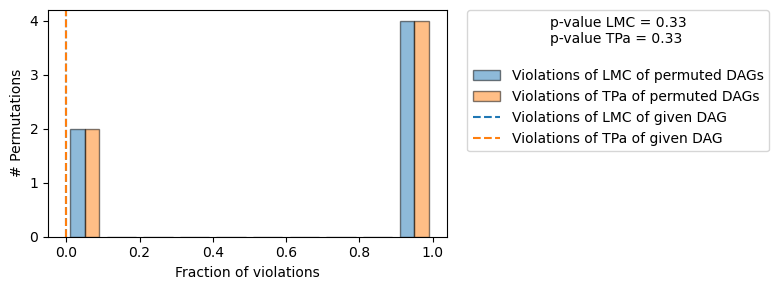

Evaluated and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Generated Distribution ====
The overall average KL divergence between the generated and observed distribution is 0.0
The estimated KL divergence indicates an overall very good representation of the data distribution.

==== Evaluation of the Causal Graph Structure ====
+-------------------------------------------------------------------------------------------------------+
|                                         Falsificaton Summary                                          |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is not informative because 2 / 6 of the permutations lie in the Markov                  |
| equivalence class of the given DAG (p-value: 0.33).                                                   |
| The given DAG violates 0/1 LMCs an

In [10]:
print(gcm.evaluate_causal_model(causal_model, data, evaluate_causal_mechanisms=False, evaluate_invertibility_assumptions=False))

Bu, oluşturulan dağılımın gözlemlenen dağılıma yakın olduğunu doğrulamaktadır.

**NOT**: Değerlendirme bize nedensel grafik yapısına ilişkin içgörüler sağlarken, grafik yapısını doğrulayamayız, yalnızca gözlemlenen yapının bağımlılıkları ile grafiğin temsil ettiği şey arasında tutarsızlıklar bulursak reddedebiliriz. Bizim durumumuzda DAG'ı reddetmiyoruz ancak reddedilmeyecek başka eşdeğer DAG'ler de var. Bunu görmek için yukarıdaki örneği düşünün - X→Y→Z ve X←Y←Z aynı gözlemsel dağılımı oluşturur (çünkü aynı koşulları kodlarlar), ancak yalnızca X→Y→Z doğru müdahalesel dağılımı oluşturur (örn. , Y'ye müdahale ederken).

# 3. GCM'in Değerlendirilmesi (Evaluating GCM)

Grafiksel nedensel bir modelin (GCM) modellenmesi, çeşitli varsayımları ve model seçimlerini gerektirir; bunların tümü, modelin performansını ve doğruluğunu etkileyebilir. Gerekli varsayımlara ilişkin bazı örnekler şunlardır:

**Grafik Yapısı**: Değişkenler arasındaki nedensel yönlerin doğru şekilde belirlenmesi çok önemlidir. Örneğin yağmurun sokağı ıslattığını söylemek mantıklı iken, ıslak sokağın yağmura neden olduğunu iddia etmek mantıklı değildir. Bu ilişkiler yanlış modellenirse ortaya çıkan nedensel ifadeler yanıltıcı olacaktır. Bununla birlikte, bu örnek oldukça basit olmasına rağmen modellerin genellikle yanlış spesifikasyonlara karşı bir miktar sağlamlık sergilediğini belirtmek önemlidir. Özellikle, yanlış belirtmenin etkisi daha büyük grafiklerde daha az şiddetli olma eğilimindedir. Ek olarak, yanlış tanımlamaların ciddiyeti de farklılık gösterebilir; örneğin, yanlış bir nedensel yön tanımlamak, bir düğümün potansiyel ebeveynleri olarak çok fazla (yukarı akış) düğümü dahil etmekten genellikle daha problemlidir.

Nedensel bir grafik yapısı, değişkenler arasındaki (koşullu) bağımsızlıklara ilişkin varsayımları tanımladığından, belirli bir grafik yapısı yanlışlanabilir. Örneğin, X→Y→Z zincirinde, Y verildiğinde X ve Z'nin bağımsız olması gerektiğini biliyoruz. Eğer durum böyle değilse, verilen grafiğin yanlış olduğuna dair bazı kanıtlarımız var. Ancak diğer taraftan daha güçlü varsayımlar olmadan bir grafiğin doğruluğunu teyit edemeyiz. Zincir örneğini takip edersek, her iki kenarı da çevirirsek, koşullu bağımsızlık ifadesi (Y sabitken Z ve X bağımsızdır) hala geçerli olacaktır.

**Nedensel Mekanizma Varsayımı**: Nedensel veri oluşturma sürecini modellemek için, her düğümü $X_i=f_i\left(P A_i, N_i\right)$ biçiminde bir nedensel mekanizma ile temsil ediyoruz; burada $N_i$ gözlemlenmeyen gürültüyü belirtir ve $P A_i$, $X_i$'ın nedensel ebeveynlerini temsil eder. Bu bağlamda $f_i$ fonksiyonunun formuna ilişkin ek bir varsayıma ihtiyacımız var. Örneğin sürekli değişkenler için, $f_i$ modelinin $X_i=f_i\left(P A_i\right)+N_i$ biçimindeki bir toplamsal gürültü modeli kullanılarak modellenmesi yaygındır. Ancak gerçek ilişki farklıysa (örneğin çarpımsal) bu gösterim doğru olmayabilir. Dolayısıyla nedensel mekanizmanın türü de sonuçları etkileyebilecek diğer bir faktördür. Ancak genel olarak sürekli durumdaki toplam gürültü modeli varsayımı pratikteki ihlallere karşı nispeten dayanıklı olma eğilimindedir.

**Model Seçimi**: Önceki iki nokta yalnızca değişkenler arasındaki nedensel ilişkilerin doğru şekilde temsil edilmesine odaklandı. Artık model seçim süreci ek bir katman ekliyor. Örnek olarak $X_i=f_i\left(P A_i\right)+N_i$ toplamsal gürültü modeline bağlı kalarak, model seçimindeki zorluk $f_i$ için en uygun modeli belirlemekte yatmaktadır. İdeal durumda bu, ortalama karesel hatayı en aza indiren model olacaktır.

Bir GCM'nin performansını etkileyen, her birinin kendi metrikleri ve zorlukları olan çok sayıda faktör göz önüne alındığında, dowhy.gcm, uygun bir GCM'yi değerlendirmeyi ve farklı değerlendirme metriklerine genel bir bakış sağlamayı amaçlayan bir modüle sahiptir. Ayrıca, otomatik atama kullanılırsa, seçim sürecinde değerlendirilen modellere ve performanslara ilişkin genel bir bakış elde edebiliriz.


## Otomatik Atamanın Özet Çıktısı

Nedensel ilişkiler hakkında önsel bilgi mevcutsa, nedensel mekanizmaları buna göre modellemek için her zaman bu bilginin kullanılması tavsiye edilir. Ancak yeterli bilgiye sahip değilseniz, GCM'ler için otomatik atama fonksiyonu, verilen verilere dayanarak her düğüm için uygun bir nedensel mekanizmanın otomatik olarak seçilmesine yardımcı olabilir. Otomatik atama iki şey yapar: 1) Uygun bir nedensel mekanizma seçin ve 2) küçük bir model havuzunda en iyi performansı gösteren modeli seçin.

Otomatik atama fonksiyonunu kullanırken, model seçim sürecine ilişkin, dikkate alınan nedensel mekanizmaların türleri ve performanslarıyla birlikte değerlendirilen modeller gibi ek bilgiler elde edebiliriz. Bunu açıklamak için X→Y→Z zincir yapısı örneğini tekrar düşünün:

In [11]:
import numpy as np, pandas as pd
import networkx as nx
import dowhy.gcm as gcm

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))

In [12]:
causal_model = gcm.StructuralCausalModel(nx.DiGraph([('X', 'Y'), ('Y', 'Z')]))
summary_auto_assignment = gcm.auto.assign_causal_mechanisms(causal_model, data)
print(summary_auto_assignment)

When using this auto assignment function, the given data is used to automatically assign a causal mechanism to each node. Note that causal mechanisms can also be customized and assigned manually.
The following types of causal mechanisms are considered for the automatic selection:

If root node:
An empirical distribution, i.e., the distribution is represented by randomly sampling from the provided data. This provides a flexible and non-parametric way to model the marginal distribution and is valid for all types of data modalities.

If non-root node and the data is continuous:
Additive Noise Models (ANM) of the form X_i = f(PA_i) + N_i, where PA_i are the parents of X_i and the unobserved noise N_i is assumed to be independent of PA_i.To select the best model for f, different regression models are evaluated and the model with the smallest mean squared error is selected.Note that minimizing the mean squared error here is equivalent to selecting the best choice of an ANM.

If non-root node

Bu senaryoda, X kök düğümüne ampirik bir dağılım atanırken, Y ve Z düğümleri için toplamsal gürültü modelleri kullanılır (nedensel mekanizma türleri hakkında daha fazla ayrıntı için bkz. Grafiksel nedensel model türleri). Her iki durumda da doğrusal regresyon modeli, ortalama karesel hatanın en aza indirilmesi açısından en iyi performansı gösterdi. Değerlendirilen modellerin ve performanslarının bir listesi de mevcuttur. Otomatik atama için varsayılan parametreyi kullandığımızdan yalnızca küçük bir model hayvanat bahçesi değerlendirilir. Ancak atama kalitesini daha fazla modele genişletmek için de ayarlayabiliriz.

Her düğüme nedensel mekanizmalar atadıktan sonraki adım, bu mekanizmaların verilere uydurulmasını içerir:

In [13]:
gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|██████████| 3/3 [00:00<00:00, 748.89it/s]


## Uydurulan GCM'nin Değerlendirilmesi

Nedensel model uyduruldu ve artık farklı nedensel sorular için kullanılabilir. Ancak öncelikle nedensel model performansına ilişkin bazı bilgiler edinmek ilgimizi çekebilir, yani şunu merak edebiliriz:

* Nedensel mekanizmalarım ne kadar iyi performans gösteriyor?
* Toplamsal gürültü modeli varsayımı verilerim için bile geçerli mi?
* GCM gözlemlenen verilerin ortak dağılımını yakalıyor mu?
* Nedensel grafik yapımız verilerle uyumlu mu?

Bunun için, genel model performansına ve varsayımlarımızın geçerli olup olmadığına dair bize bazı bilgiler sağlayan nedensel model değerlendirme fonksiyonunu kullanabiliriz:

Test permutations of given graph: 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]


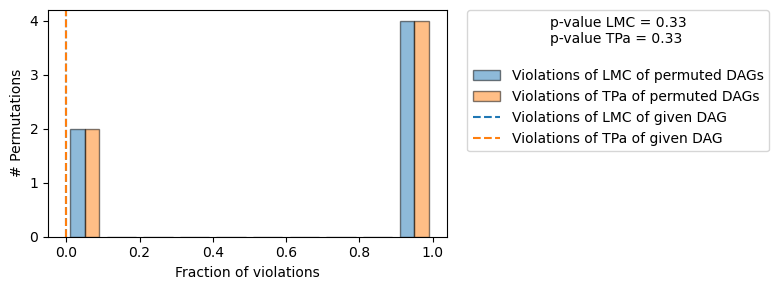

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [14]:
summary_evaluation = gcm.evaluate_causal_model(causal_model, data, compare_mechanism_baselines=True)
print(summary_evaluation)